Préambule :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import log

<center><font size=+4> TD Modélisation 3 : Chimie </font></center>

# Détermination de l'avancement d'une réaction par dichotomie

Ce travail suit celui porposé par l'énoncé donné par Mme AUZELY sur la synthèse de l'ammoniac. On rapelle ici le principal résultat :
$$ \Delta_r G (\tau = \tau_{eq}) = \Delta_rG° + RT ln K° = \Delta_r H° - T\Delta_r S° + RT \ln \frac{4\tau_{eq}^2 (4 - 2\tau_{eq})^2 P°^2}{27(1-\tau_{eq})^4 P^2} = 0$$ avec $\tau_{eq} = \frac{\xi_{eq}}{\xi_{max}}$ taux avancement à l'equilibre. Le but de cet exercice est de déterminer, via une méthode par dichotomie, la valeur de ce taux d'avancement à l'équilibre en fonction des variables d'état P et T.

**Question 1 :** Dans quel intervalle de valeur se trouve de façon sûr $\tau_{eq}$ ? Expliquer succinctement comment on peut procéder par dichotomie pour déterminer un  encadrement de $\tau_{eq}$. On précisera quel "intervalle" on "coupera" en deux à chaque itération de l'algorithme, et selon quel critère on choisira le "bon" sous-intervalle. 

$\tau_{eq} \in [0,1]$, il s'agit de l'intervalle initial des valeurs possibles pour le taux d'avancement. Le but de chaque itération de la méthode de dichotomie est de diviser l'intervalle des valeurs possibles pour $\tau$ en deux, de telle sorte que le nouvel intervalle encadre la valeur du "vrai" taux d'avancement à l'équilibre $\tau_{eq}$, celle annulant la fonction $\Delta_r G (\tau)= \Delta_r H° - T\Delta_r S° + RT \ln \frac{4\tau^2 (4 - 2\tau)^2 P°^2}{27(1-\tau)^4 P^2}$. Pour cela, à chaque étape, on évaluera la signe de $\Delta_r G$ au début de l'intervalle, au milieu et à la fin : on pourra alors déterminé si $\Delta_r G$ change de signe (et donc s'annule) sur l'un des deux sous-intervalle.

*Remarque : pour que cette méthode soit efficace, il est nécessaire que la fonction $\Delta_r G (\tau)$ soit monotone et s'annule bien dans l'intervalle $[0,1]$. Croisons les doigts... mais normalement la nature est bien faite, une réaction ne peut avoir 2 valeurs possibles d'avancement à l'équilibre !*

Commençons par déclarer les données du problème :

In [2]:
DrH = -91800    # enthalpie standard de reaction en J/mol
DrS = -199      # entropie standard de reaction en J/mol/K
R = 8.31        # constante des G.P. en J/mol/K

On a : $\Delta_r G (\tau) = \Delta_rG° + RT ln Q = \Delta_r H° - T\Delta_r S° + RT \ln \frac{4\tau^2 (4 - 2\tau)^2 P°^2}{27(1-\tau)^4 P^2}$

**Question 2 :** Ecrire la fonction `DrG(tau, T, P)` renvoyant l'enthalpie libre de réaction pour le taux d'avancement `tau`, la température `T` et la pression `P`.

In [1]:
def DrG(tau,T,P):
    """ Retourne la valeur de l'enthalpie libre de reaction pour le taux d'avancement tau à T,P"""
    
    return DrH-DrS*T+R*T*log(4*(tau**2)*(4-2*tau)**2/(27*(1-tau)**4*P**2))

**Question 3** : Ecrire la fonction `tau_eq_dicho(T,P,delta_tau)` retournant $\tau$ la valeur approchée du taux d'avancement à l'équilibre pour la température `T` et la pression `P`. On procédera par dichotomie, à partir de l'intervalle initial $[10^{-4},1-10^{-4}]$ (on évite les valeurs $0$ et $1$ pour cause de divergence de $\Delta_r G$). La valeur "vraie" du taux d'avancement à l'équilibre $\tau_{eq}$ doit se trouver de façon sûr dans l'intervalle $[\tau-\Delta\tau, \tau+\Delta\tau]$.

In [14]:
def tau_eq_dicho(T,P,delta_tau):
    """ Retourne l'avancement de la reaction à l'equilibre, la recherche de la solution
    est effectuée par dichotomie. 
    L'algorithme s'arrête lorsque l'intervalle de dichotomie est de longeur 2*delta_tau """

    # Intervalle initial de valeurs de tau 
    tau_min = 1e-4
    tau_max = 1 - 1e-4 
    
    # Valeur initale de tau au milieu de l'intervalle
    tau_mil = (tau_min + tau_max) / 2 

    while tau_max - tau_min > 2 * delta_tau :   # condition d'arret : [tau_min, tau_max] moins long que 2*delta_tau
        
        if DrG(tau_min,T,P)*DrG(tau_mil,T,P) < 0 : # si DrG change de signe dans la moitie gauche de l'intervalle
            # On choisit alors cet motié gauche de l'intervalle, en changeant la valeur de t_max :
            tau_max = tau_mil
        
        elif DrG(tau_mil,T,P)*DrG(tau_max,T,P) < 0 : # si DrG change de signe dans la moitie droite de l'intervalle
            # On choisit alors cet motié droite de l'intervalle, en changeant la valeur de t_min :
            tau_min = tau_mil
        
        else :
            return "Problème : pas d'annulation de Delta_r G"
                    
        # Mise ajour du milieu de l'inervalle 
        tau_mil = (tau_min + tau_max) / 2
        
    return tau_mil

**Question 4 :** Tracer un graphe représentant le taux d'avancement à l'équilibre, en fonction de la température en Kelvin (dans l'intervalle $[300\ K, 1200\ K]$), pour les 4 pressions suivantes : 1 bar, 5 bar, 25 bar et enfin 125 bar.

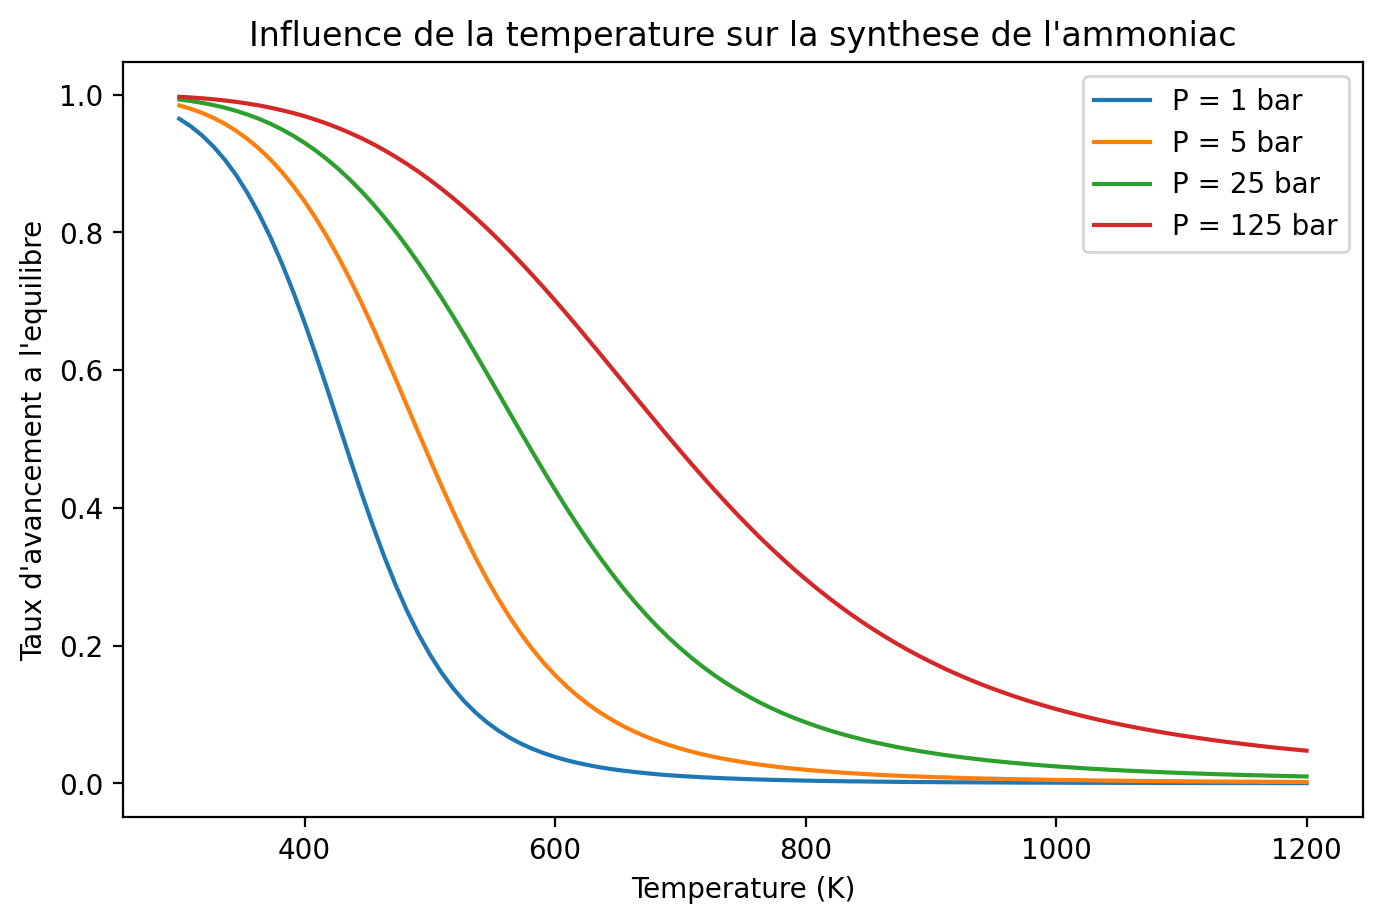

In [17]:
# Valeurs de pression pour lesquelles le graphe est effectué (en bar):
liste_P = [1,5,25,125]

# Intervalle de temperature etudie : 300 K - 1200 K
liste_T = np.linspace(300,1200,100)  # Valeurs des T (abscisse des graphes)

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)

for P in liste_P:
    # Creation de la liste des avancements a l'equilibre a la pression P
    # L'avancement maximal est de 1 mol, le taux d'avancement est egal
    # a la valeur numerique de l'avancement exprime en mol
    liste_tau = []
    for T in liste_T:
        liste_tau.append(tau_eq_dicho(T,P,1e-4))

    # Trace de la courbe pour la pression P
    plt.plot(liste_T,liste_tau,label='P = '+str(P)+' bar')


plt.ylabel("Taux d'avancement a l'equilibre")
plt.xlabel("Temperature (K)")
plt.legend()
plt.title("Influence de la temperature sur la synthese de l'ammoniac")

plt.show()

# Méthode d'Euler et équations couplées

Cet exercice repose sur une partie du problème de Physique-Chimie du concours Centrale 2015 MP. Voici une partie de l'énoncé :

*Le glycol ou éthane-1,2-diol ou encore éthylèneglycol (formule brute $C_2H_6O_2$) est principalement utilisé pour fabriquer des polyesters et des mélanges de refroisdissement antigel pour l'automobile. C'est à cette dernière utilisation que nous nous intéressons ici.*

*Le glycol résulte de l'addition d'eau à l'oxyde d'éthylène, en phase gazeuse, selon la réaction (I) d'équation :*

<img src="im/equation1.png">

*Cette réaction est effectuée à 473K et sous une pression p = 15,0 bar. Industriellement, le temps de passage dans le réacteur ne permet pas d'atteindre l'état d'équilibre thermodynamique et on constate l'apparition de diéthylèneglycol (noté D). Pour modéliser la formation de glycol et de diéthylèneglycol, une deuxième réaction (II), concurrente de (I), est envisagée. Les réaction (I) et (II) seront considérées comme totales.*

<img src="im/equation2.png">

*Les réactions sont supposées d'ordre 1 par rapport à chacun des réactifs. Pour traduire le fait que l'eau réagit moins vite que le glycol sur l'oxyde d'éthylène, les constantes de vitesse  $k_1$ et $k_2$ sont choisies telles que $k_2 = 5 k_1$. Le mélange initial est constitué d'oxyde d'éthylène et d'eau à la concentration molaire $1,00\ mol.L^{-1}$ chacun. On note $\xi_{v,1}$ et $\xi_{v,2}$ les avancements volumiques respectivement de la réaction (I) et de la réaction (II).*

On simplifie l'écriture de la première réaction : $O + H_2 O \rightarrow E$ , et celle de la seconde : $O+E \rightarrow D$. Contrairement à l'énoncé, on ne donnera pas pour l'instant les valeurs des concentrations initiales, on notera $[O] (t=0) = [O]_i$ et $[H_2 O] (t=0) = [H_2 O]_i$ (les autres concentrations initiales seront prises nulles).

**Question 1 :** Que valent les concentrations molaires en chacun des réactants (réactifs et produits des réactions)
au temps $t$ en fonction des avancements volumiques $\xi_{1,v}$ et $\xi_{2,v}$ ?

**Correction 1 :** "Tableau d'avancement" des deux réactions, **simultanées** et **concurrentes** :

<img src="im/tableau.png">

On a donc : $$\begin{cases}[O] = [O]_i-\xi_{1,v} - \xi_{2,v} \\ [H_2 O] = [H_2 O]_i - \xi_{1,v}\\ [E] = \xi_{1,v} - \xi_{2,v}\\ [D] = \xi_{2,v} \end{cases}$$

**Question 2 :** Établir le système d’équations différentielles en $\xi_{1,v}$ et $\xi_{2,v}$.

**Correction :** Comme les réactions sont d'ordres partiels 1 par rapport à chaque réactif :
$$ \begin{cases}
v_1 = \frac{d \xi_{1,v}}{dt} = k_1 [O][H_2 0] \\
v_2 = \frac{d \xi_{2,v}}{dt} = k_2 [O][E]
\end{cases} $$
Soit :
$$ \begin{cases}
\frac{d \xi_{1,v}}{dt} = k_1 ([O]_i-\xi_{v,1}-\xi_{v,2})([H_2 O]_i-\xi_{v,1}) \\
\frac{d \xi_{2,v}}{dt} = k_2  ([O]_i-\xi_{v,1}-\xi_{v,2})( \xi_{v,1}-\xi_{v,2})
\end{cases} $$
On peut aussi écrire :
$$ \begin{cases}
\frac{d [O] }{dt} = -v_1 -v_2 = - k_1 [O][H_2 0]-k_2 [O][E] \\
\frac{d [H_2 0]}{dt} = -v_1 = - k_1 [O][H_2 0] \\
\frac{d [E] }{dt} = v_1 -v_2 = k_1 [O][H_2 0]-k_2 [O][E] \\
\frac{d [D] }{dt} = v_2 = k_2 [O][E]
\end{cases} $$

La résolution analytique de ce système d'équations n'est pas aisée... C'est pourquoi on va utiliser une résolution numérique, via une méthode d'Euler.

**Question 3 :**  Ecrire la fonction `Euler_cin(tf,o_i,H20_i,k1,k2,n)` prenant pour argument `tf` le temps final, `o_i` concentration initiale en oxyde d'éthylène, `H20_i` la concentration initiale en eau, `k1` et `k2` les deux constantes de vitesse et `n`. Cette fonction appliquera la méthode d'Euler sur `n` intervalles, pour retourner les listes `O`, `H20`, `E` et `D`, contenant les concentrations des différents réactants aux n+1 instants considérés, ainsi que `T`, la liste de ces temps. On commencera la résolution numérique au temps initial $t_i =0$.  

**Correction 3 :** Première version, en utilisant deux variables (les deux avancements volumiques), avec les deux équations différentielles :

$$ \begin{cases}
\frac{d \xi_{1,v}}{dt} = k_1 ([O]_i-\xi_{v,1}-\xi_{v,2})([H_2 O]_i-\xi_{v,1}) \\
\frac{d \xi_{2,v}}{dt} = k_2  ([O]_i-\xi_{v,1}-\xi_{v,2})( \xi_{v,1}-\xi_{v,2})
\end{cases} $$

Suite à la méthode d'Euler, on obtiendra alors les deux avancements, qui pourront redonner toutes les concentrations intéressantes via :
$$\begin{cases}[O] = [O_i]-\xi_{1,v} - \xi_{2,v} \\ [H_2 O] = [H_2 O]_i - \xi_{1,v}\\ [E] = \xi_{1,v} - \xi_{2,v}\\ [D] = \xi_{2,v} \end{cases}$$

In [2]:
def Euler_cin(tf,o_i,h2o_i,k1,k2,n):
    X1, X2, T = np.zeros(n+1), np.zeros(n+1), np.zeros(n+1) #avancements (la première valeur, valeur initiale, est bonne !) et temps
    h = tf/n
    for j in range(n+1):
        T[j] = T[j-1]+h
        X1[j] = X1[j-1] + h * k1 * (o_i - X1[j-1] - X2[j-1]) * (h2o_i - X1[j-1])
        X2[j] = X2[j-1] + h * k2 * (o_i - X1[j-1] - X2[j-1]) * (X1[j-1] - X2[j-1])
    O = o_i - X1 - X2
    H2O = h2o_i - X1
    E = X1 - X2
    D = X2        
    return T, O, H2O, E, D  

On peut aussi n'utiliser que les concentrations des espèces, et non l'avancement, grâce aux équations différentielles :

$$ \begin{cases}
\frac{d [O] }{dt} = -v_1 -v_2 = - k_1 [O][H_2 0]-k_2 [O][E] \\
\frac{d [H_2 0]}{dt} = -v_2 = -k_2 [O][E] \\
\frac{d [E] }{dt} = v_1 -v_2 = k_1 [O][H_2 0]-k_2 [O][E] \\
\frac{d [D] }{dt} = v_2 = k_2 [O][E]
\end{cases} $$

In [4]:
def Euler_cin2(tf,o_i,h2o_i,k1,k2,n):
    O, H2O, E, D, T = [o_i], [h2o_i], [0], [0], [0]
    h = tf/n
    for j in range(1, n+1):
        T.append(T[j-1] + h)
        O.append(O[j-1] - h * O[j-1] * ( k1 * H2O[j-1] + k2 * E[j-1]))
        H2O.append(H2O[j-1] - h * k1* O[j-2] * H2O[j-1])
        E.append(E[j-1] + h * O[j-2] * ( k1 * H2O[j-2] - k2 * E[j-1]))
        D.append(D[j-1] + h * k2 * O[j-2] * E[j-2])
    return T, O, H2O, E, D  

Une dernière version, "mixte" : on utilise les équations différentielles (et donc la méthode d'Euler) mixant les avancements volumiques et les concentrations des espèces :
$$ \begin{cases}
\frac{d \xi_{1,v}}{dt} = k_1 [O][H_2 0] \\
\frac{d \xi_{2,v}}{dt} = k_2 [O][E]
\end{cases} $$
Suite à la méthode d'Euler, on obtiendra alors les deux avancements, qui pourront redonner toutes les concentrations intéressantes via :
$$\begin{cases}[O] = [O_i]-\xi_{1,v} - \xi_{2,v} \\ [H_2 O] = [H_2 O]_i - \xi_{1,v}\\ [E] = \xi_{1,v} - \xi_{2,v}\\ [D] = \xi_{2,v} \end{cases}$$

In [11]:
def Euler_cin3(tf,o_i,h2o_i,k1,k2,n):
    # Valeurs initiales 
    X1, X2, T, E, D = [0], [0], [0], [0],[0]
    O = [o_i]
    H2O = [h2o_i]
    h = tf/n
    for j in range(1,n+1):
        T.append(T[j-1]+h)
        X1.append(X1[j-1] + h * k1 * O[j-1] * H2O[j-1])
        X2.append(X2[j-1] + h * k2 * O[j-1] * E[j-1])
        O.append(o_i - X1[j] - X2[j])
        H2O.append(h2o_i - X1[j])
        E.append(X1[j] - X2[j])
        D.append(X2[j])
    return T, O, H2O, E, D    

**Question 4 :** Réaliser le graphique représentant les concentrations des différentes espèces en fonction du temps, en accord avec le problème initial ($[H_2 O]_i = [O]_i = 1$). Par soucis de simplicité, on choisit une unité de temps arbitraire permettant de prendre $k_1 = 1 ua$ ( ua : unité arbitraire), et $k_2 = 5 ua$. On prendra $t_f = 10 ua$ et n = 1000.


**Correction 4 :**

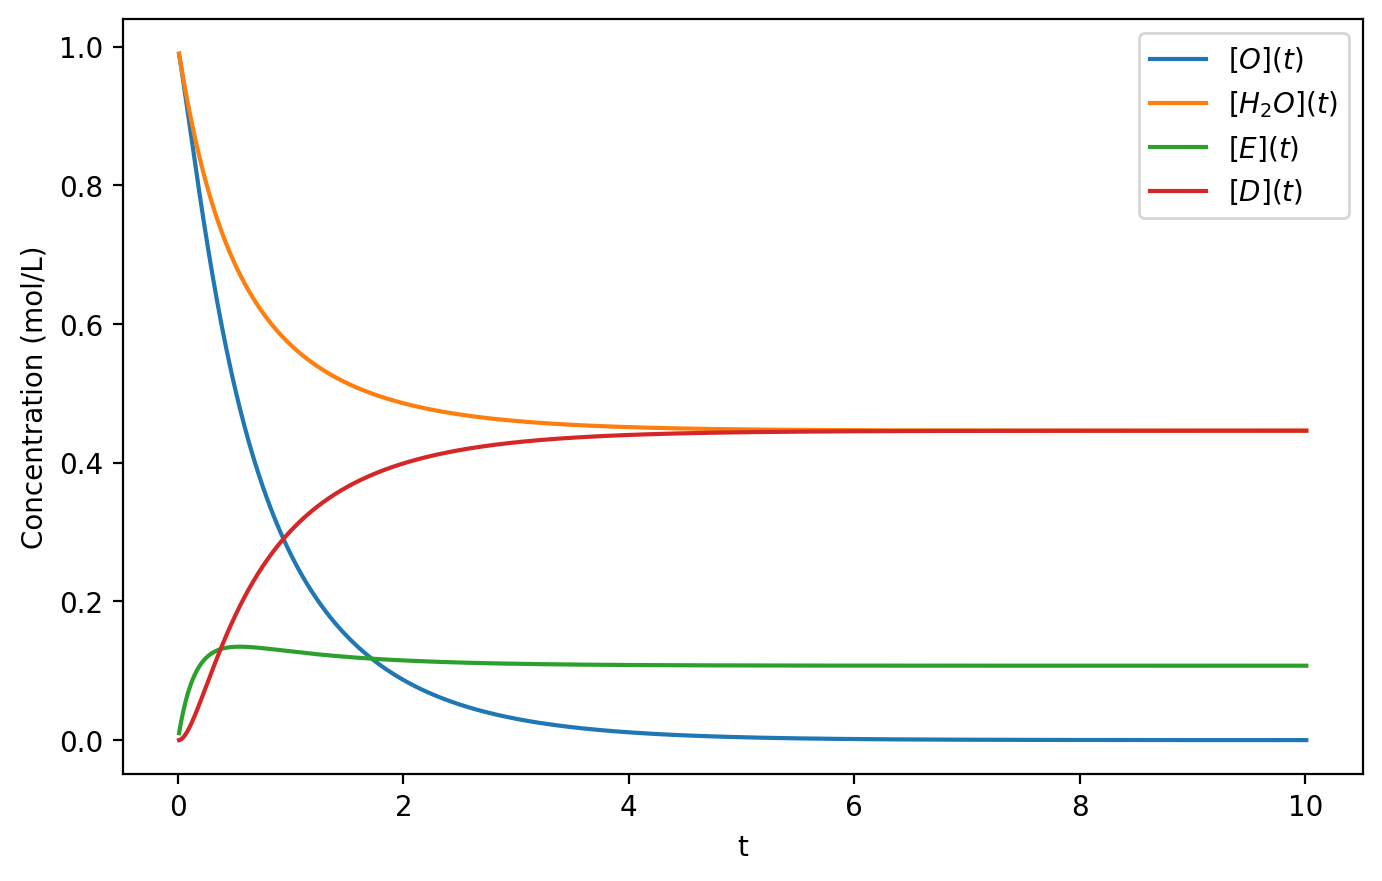

In [13]:
T, O, H2O, E, D = Euler_cin(10,1,1,1,5,1000)

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.plot(T,O,label=r'$ [O](t)$')
plt.plot(T,H2O,label=r'$ [H_2 O](t)$')
plt.plot(T,E,label=r'$ [E](t)$')
plt.plot(T,D,label=r'$ [D](t)$')

plt.xlabel("t")
plt.ylabel("Concentration (mol/L)")
plt.legend()
plt.show()

Ci-dessus, le graphique obtenu.

**Question 5 :** Quelle conclusion peut-on en tirer quant à la synthèse industrielle du glycol ?

**Correction 5 :** Très peu productif... On forme surtout du dithylène glycol !

Pour remédier à ce problème, dans l’industrie, l’eau et l’oxyde d’éthylène sont introduits dans un rapport 25/1, en restant dans les mêmes conditions de température et de pression. Nous garderons une concentration de $1,00\  mol.L^{-1}$ pour l'oxyde d'éthylène.

**Question 6 :** Réaliser le graphique représentant les concentrations $[E](t)$ et $[D](t)$ en fonction du temps, en accord avec le problème initial, puis avec les nouvelles conditions initiales. On prendra tf=10ua et n = 1000.

**Correction 6 :**

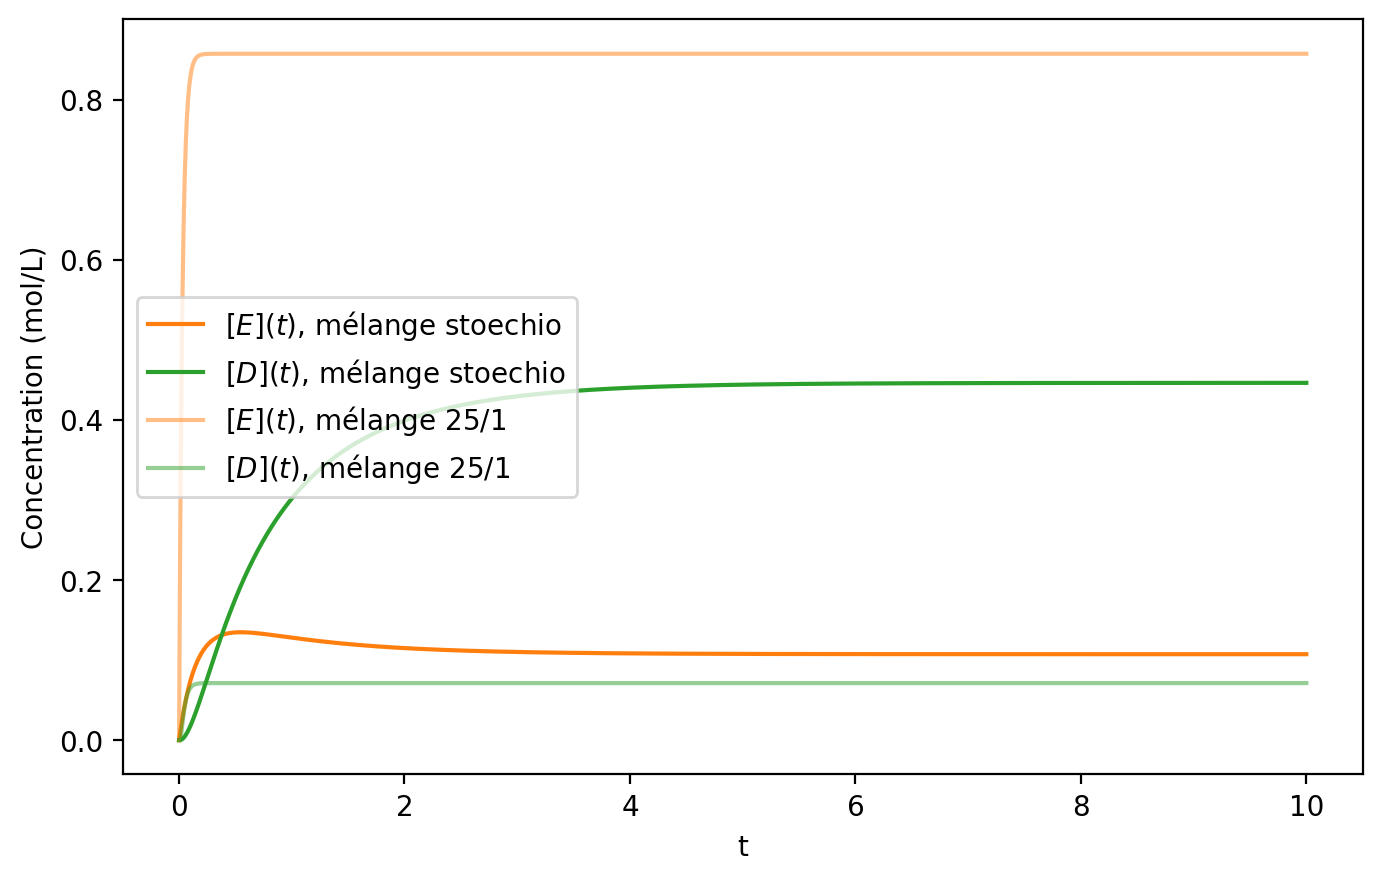

In [6]:
T, O, H2O, E, D = Euler_cin(10,1,1,1,5,1000)
ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.plot(T,E,'C1',label=r'$ [E](t)$, mélange stoechio')
plt.plot(T,D,'C2',label=r'$ [D](t)$, mélange stoechio')

T, O, H2O, E, D = Euler_cin(10,1,25,1,5,1000)
plt.plot(T,E,'C1',alpha = 0.5,label=r'$ [E](t)$, mélange 25/1')
plt.plot(T,D,'C2',alpha = 0.5,label=r'$ [D](t)$, mélange 25/1')

plt.xlabel("t")
plt.ylabel("Concentration (mol/L)")
plt.legend()
plt.show()

Ci-dessus, le graphe obtenu.

**Question 7 :** Quel est le facteur cinétique qui intervient ici ? Quelle conséquence cela a-t-il sur les réactions (IV.1) et (IV.2) ?

**Correction 7 :** Dans ce cas, il y a dégénérescence de l’ordre car $[H_2 O] \simeq cste$. La première réaction (IV.1) est alors une simple réaction d’ordre 1, avec une constante de vitesse apparente $k_{1,app}=25k_1$. Elle devient
ainsi plus rapide que la deuxième réaction (IV.2), ce qui permet au glycol d’être fabriqué en quantité
importante sans être tout de suite consommé.

**Question 8 :** Représenter, dans les mêmes conditions que celles de la question précédente, un nouveau graphique représentant en abscisse la concentration $[D](t)$ et en ordonnée la concentration $[E](t)$.

**Correction 8 :**

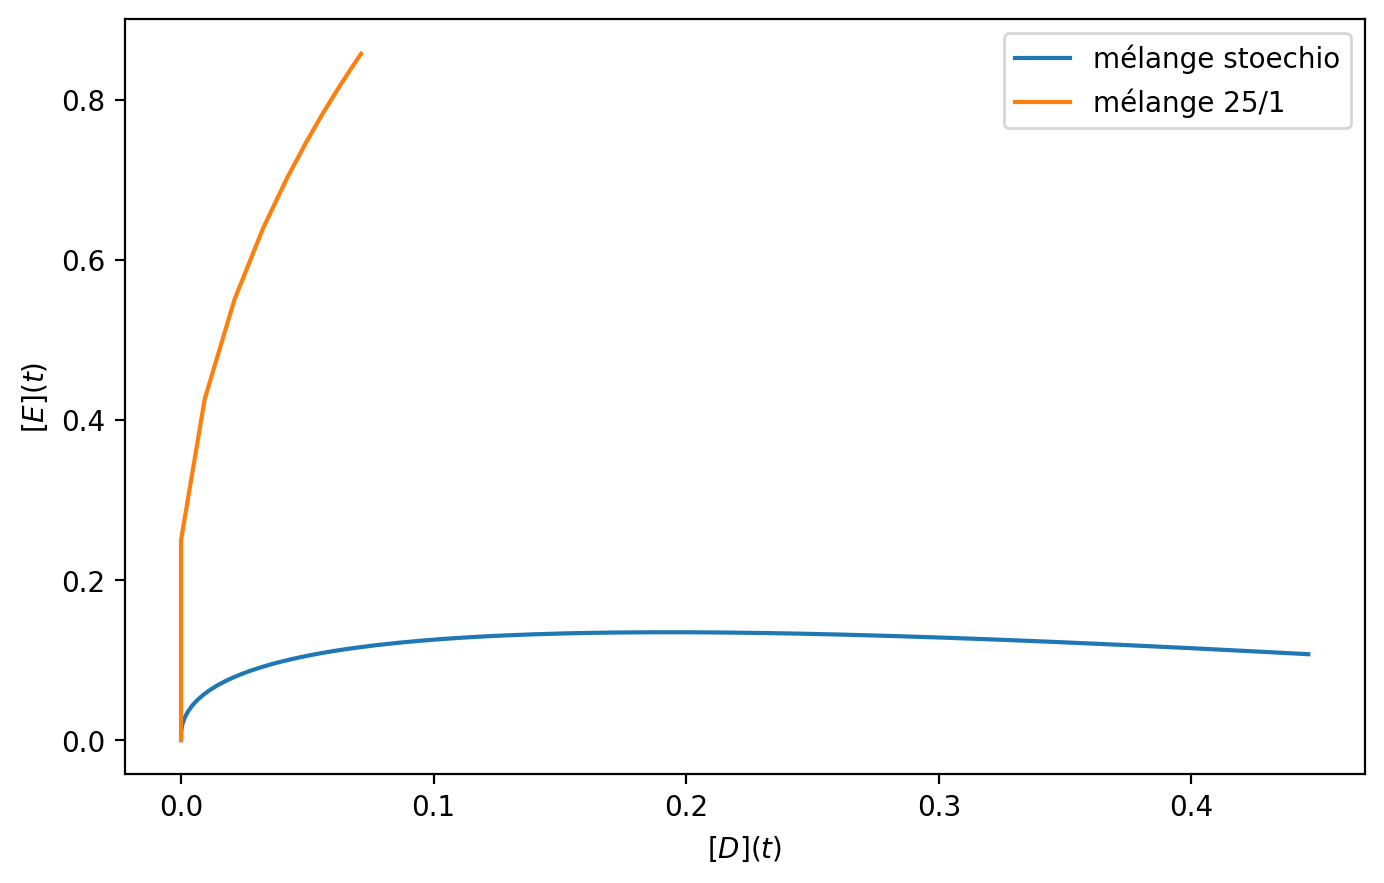

In [8]:
T, O, H2O, E, D = Euler_cin(10,1,1,1,5,1000)

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.plot(D,E,label='mélange stoechio')

T, O, H2O, E, D = Euler_cin(10,1,25,1,5,1000)
plt.plot(D,E,label='mélange 25/1')

plt.ylabel(r'$[E](t)$')
plt.xlabel(r'$[D](t)$')
plt.legend()
plt.show()

# Remplissage de couches électroniques 

On considère le remplissage des couches électroniques  d'un atome. A chaque couche est associé un nombre quantique principal $n \in \mathbb{N}$, et à chaque couche est associée plusieurs sous-couches, indexées par l'entier $l$ tel que $0 \neq l < n$. Traditionnellement, on associe la lettre $s$ à l'entier $l=0$, $p$ à l'entier $l=1$, etc.

**Question 1 :** Rappeler la règle de Klechkowski donnant l'ordre de remplissage de ces couches.

*Correction :* On remplit les couches par nombre $n+l$ croissant, avec, en cas d'égalité, priorité au nombre $n$ le plus petit.

**Question 2 :** Ecrire une fonction `couche_suivante(n,l)` qui, étant donné une sous-couche $(n,l)$ pleine, retourne la sous-couche $(ns,ls)$ suivante à remplir.

In [76]:
def couche_suivante(n,l):
    if l > 0 : # si on ne se trouve pas déjà sur une sous-couche s
        return n+1,l-1 # n+l conserve la même valeur, mais n augmente
    else :
        # n+l augmente de 1 (ns+ls = n+l+1=n+1), on commence par ns le plus petit possible,
        # et donc ls le plus grand possible : essayons ls=ns-1, soit ns = n/2+1
        # cela ne fonctionne evidemement que si n est pair...
        if n%2 == 0 :
            return int(n/2+1),int(n/2)
        # Sinon on essaye avec ls=ns-2, et donc ns=n/2 +1.5, fonctionne pour n impair
        else :
            return int(n/2+1.5),int(n/2-0.5)

In [77]:
# Ou, plus élégant :

def couche_suivante(n,l):
    if l > 0 : 
        return n+1,l-1 
    else :
        return n//2+n%2+1,n//2  

In [78]:
# Tests :

couche_suivante(4,1),couche_suivante(2,0),couche_suivante(3,0),couche_suivante(4,0),couche_suivante(5,0)

((5, 0), (2, 1), (3, 1), (3, 2), (4, 2))

**Question 3 :** Ecrire une fonction `souscouches(Z)` qui, pour un atome de numéro atomique `Z`, renvoie une liste de liste `C` telle que `C[n-1][l]` vaut le nombre d'électrons dans la sous-couche $(n,l)$ (`[n-1]` pour commencer à 0...).

In [79]:
def souscouches(Z):
    C=[[0]]
    n,l,m = 1,0,0
    nmax = 0
    while Z != 0 :
        if m == 2*(2*l+1) : # si la sous-couche est pleine, on passe à la suivante
            n,l = couche_suivante(n,l)
            m = 0
            if n > nmax :
                C.append([]) # on créé la nouvelle couche n
                nmax = n
            C[n-1].append(0) # pour l'instant aucun électron dans la nouvelle sous-couche
        else : # sinon on met un électron de plus dans la sous-couche considérée
            C[n-1][l] += 1
            Z -= 1
            m += 1
    return C

In [80]:
# Test
souscouches(28)

[[2], [2, 6], [2, 6, 8], [2]]

**Question 4 :** Ecrire une fonction `Remplissage_couches(Z)` qui, pour un atome de numéro atomique `Z`, renvoie la chaîne de caractère `1s2 2s2 2p`...

In [81]:
def Remplissage_couches(Z):
    C = souscouches(Z)
    N = len(C)
    Lettres = "spdfgh"
    Chaine = ""
    for n in range(1,N+1):
        L = len(C[n-1])
        for l in range(L):
            Chaine += str(n)+Lettres[l]+str(C[n-1][l])+" "
    return Chaine

In [82]:
# Test
Remplissage_couches(65)

'1s2 2s2 2p6 3s2 3p6 3d10 4s2 4p6 4d10 4f9 5s2 5p6 6s2 '

# Problème : CCP 2020 !!
